In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Loading BSC1 dataset

bsc1 = pd.read_excel('../DataSet/BSc1DADataSetFinal.xlsx',header=[1,2])  # Assuming your file has multi-level headers
print(bsc1)


     Student_Details                                           \
              RollNo   EnrolNo Part1Total GrandTotal   Result   
0            2202001  U2112626        214        214  Elig/SE   
1            2202002  U2112395        132        132   Failed   
2            2202003  U2112367        200        200   Passed   
3            2202004  U2112016         AA         AA   Absent   
4            2202005  U2112649         AA         AA   Absent   
...              ...       ...        ...        ...      ...   
3312         2206715  I2110715        100        100   Failed   
3313         2206716  I2110716        115        115   Failed   
3314         2206717  I2110717        249        249   Passed   
3315         2206718  I2110719         AA         AA   Absent   
3316         2206719  I2110718        241        241   Passed   

                                              Physics                 \
     Mechanics and Special Theory of Relativity S.T.R Thermal Phyics   
0         

In [28]:
# Converting each practicals column in number
# Filter only columns where the second-level column name is 'Practicals'
practicals_cols = bsc1.loc[:, bsc1.columns.get_level_values(1) == 'Practicals']

# Convert all practicals columns to numeric (invalids to NaN)
bsc1[practicals_cols.columns] = practicals_cols.apply(pd.to_numeric, errors='coerce')

In [3]:
# Traversing and finding all those subjects who have practical subjects

for subject,subheadings in bsc1.columns:
    if(subheadings=="Practicals"):
        print(f"Subject: {subject} , Subheading = {subheadings}")
        # Converting each of column into numeric
        bsc1[(subject, subheadings)] = pd.to_numeric(bsc1[(subject, subheadings)], errors='coerce')



Subject: Physics , Subheading = Practicals
Subject: Chemistry , Subheading = Practicals
Subject: Computer Science , Subheading = Practicals
Subject: Psychology , Subheading = Practicals
Subject: Defence Studies , Subheading = Practicals
Subject: Statistics , Subheading = Practicals
Subject: Biochemistry , Subheading = Practicals
Subject: Botany , Subheading = Practicals
Subject: Zoology , Subheading = Practicals
Subject: Geography , Subheading = Practicals
Subject: Geology , Subheading = Practicals


In [ ]:
# Dictionary for storing each practical marks of each subject into practical dictionary
practicals_sum = {}

for subject, subheadings in bsc1.columns:
    # Skip non-numeric columns if any
    if(subheadings=="Practicals"):
        try:
            total = pd.to_numeric(bsc1[(subject, subheadings)], errors='coerce').sum(skipna=True)
            # print(f"Subject: {subject}, Subheading: {subheadings}, Total Marks: {total}")
            practicals_sum[subject] = total
        except Exception as e:
            print(f"Skipped ({subject}, {subheadings}) due to error: {e}")

for subject,marks in practicals_sum.items():
    print(f"{subject}:{marks}")

Physics:41879.0
Chemistry:62729.0
Computer Science:11585.0
Psychology:881.0
Defence Studies:6480.0
Statistics:4890.0
Biochemistry:2234.0
Botany:24110.0
Zoology:29844.0
Geography:866.0
Geology:909.0


In [5]:
# Storing name of subjects in a list having practical subjects
theory_sum = {}
practical_subs = []

for subject, subheadings in bsc1.columns:
    # Skip non-numeric columns if any
    if(subheadings=="Practicals"):
        practical_subs.append(subject)

print(practical_subs)

['Physics', 'Chemistry', 'Computer Science', 'Psychology', 'Defence Studies', 'Statistics', 'Biochemistry', 'Botany', 'Zoology', 'Geography', 'Geology']


In [6]:
# Dictionary to store total marks of non-practical subheadings
non_practicals_sum = {}


# Now calculate sum of non-practical subheadings for those subjects
for subject in practical_subs:
    total = 0
    for subj, sub in bsc1.columns:
        if subj == subject and sub != "Practicals":
            try:
                col_data = pd.to_numeric(bsc1[(subj, sub)], errors='coerce')
                total += col_data.sum(skipna=True)
            except Exception as e:
                print(f"Skipped ({subj}, {sub}) due to error: {e}")
    non_practicals_sum[subject] = total

# Print the final result
for subject, marks in non_practicals_sum.items():
    print(f"{subject}: {marks}")

Physics: 62097.0
Chemistry: 81074.0
Computer Science: 21123.0
Psychology: 1824.0
Defence Studies: 11483.0
Statistics: 6406.0
Biochemistry: 3610.0
Botany: 38031.0
Zoology: 44373.0
Geography: 1669.0
Geology: 1531.0


In [7]:
# print(practicals_sum)
# print(non_practicals_sum)

print("Marks of practical subjects")
for subject,marks in practicals_sum.items():
    print(f"{subject}:{marks}")

print("\n\nMarks of non practical subjects")
for subject,marks in non_practicals_sum.items():
    print(f"{subject}:{marks}")



Marks of practical subjects
Physics:41879.0
Chemistry:62729.0
Computer Science:11585.0
Psychology:881.0
Defence Studies:6480.0
Statistics:4890.0
Biochemistry:2234.0
Botany:24110.0
Zoology:29844.0
Geography:866.0
Geology:909.0


Marks of non practical subjects
Physics:62097.0
Chemistry:81074.0
Computer Science:21123.0
Psychology:1824.0
Defence Studies:11483.0
Statistics:6406.0
Biochemistry:3610.0
Botany:38031.0
Zoology:44373.0
Geography:1669.0
Geology:1531.0


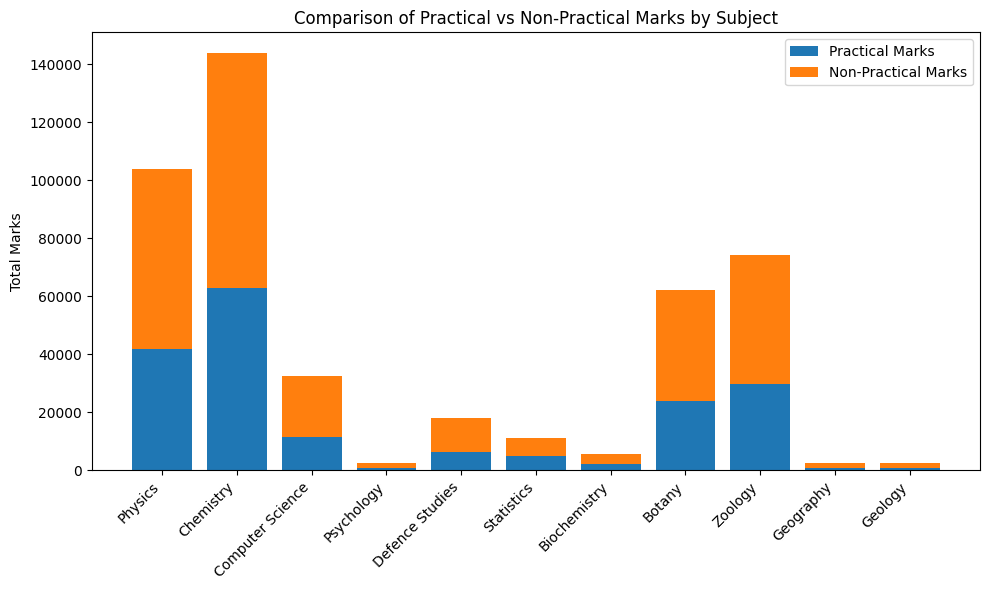

In [8]:
import matplotlib.pyplot as plt

subjects = list(practicals_sum.keys())
practical_marks = [practicals_sum[subj] for subj in subjects]
non_practical_marks = [non_practicals_sum[subj] for subj in subjects]

x = range(len(subjects))

plt.figure(figsize=(10, 6))
plt.bar(x, practical_marks, label='Practical Marks')
plt.bar(x, non_practical_marks, bottom=practical_marks, label='Non-Practical Marks')
# plt.xticks(x, subjects)
plt.xticks(x, subjects, rotation=45, ha='right')
plt.ylabel("Total Marks")
plt.title("Comparison of Practical vs Non-Practical Marks by Subject")
plt.legend()
plt.tight_layout()
plt.show()

In [93]:
contribution_percent = {}
for subject in practicals_sum:
    practical = practicals_sum[subject]
    non_practical = non_practicals_sum.get(subject, 0)
    total = practical + non_practical
    percent = (practical / total) * 100 if total > 0 else 0
    contribution_percent[subject] = round(percent, 2)

print("Practical Contribution (%):")
for subject, percent in contribution_percent.items():
    print(f"{subject}: {percent}%")

Practical Contribution (%):
Physics: 40.28%
Chemistry: 43.62%
Computer Science: 35.42%
Psychology: 32.57%
Defence Studies: 36.07%
Statistics: 43.29%
Biochemistry: 38.23%
Botany: 38.8%
Zoology: 40.21%
Geography: 34.16%
Geology: 37.25%


In [94]:
for subject, percent in contribution_percent.items():
    if percent > 40:
        print(f"⚠️ High practical weight in {subject}: {percent}%")

⚠️ High practical weight in Physics: 40.28%
⚠️ High practical weight in Chemistry: 43.62%
⚠️ High practical weight in Statistics: 43.29%
⚠️ High practical weight in Zoology: 40.21%


In [95]:
import pandas as pd

combined_df = pd.DataFrame({
    "Subject": practicals_sum.keys(),
    "Practical Marks": practicals_sum.values(),
    "Non-Practical Marks": [non_practicals_sum[subj] for subj in practicals_sum.keys()],
    "Practical %": [contribution_percent[subj] for subj in practicals_sum.keys()]
})

combined_df.to_excel("subject_analysis.xlsx", index=False)

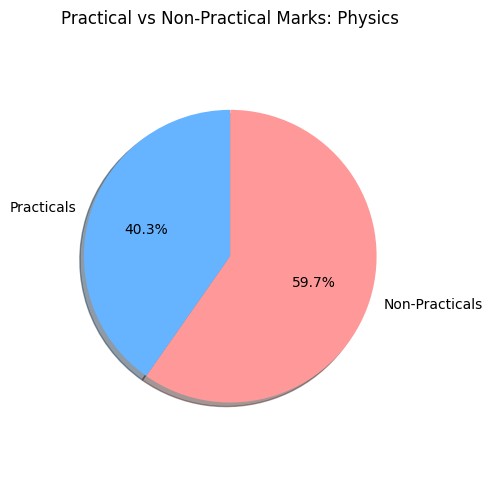

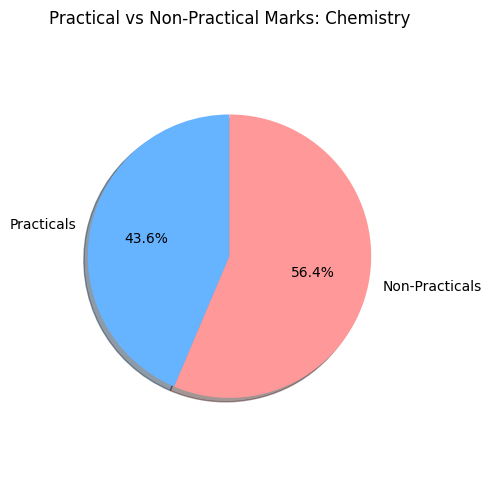

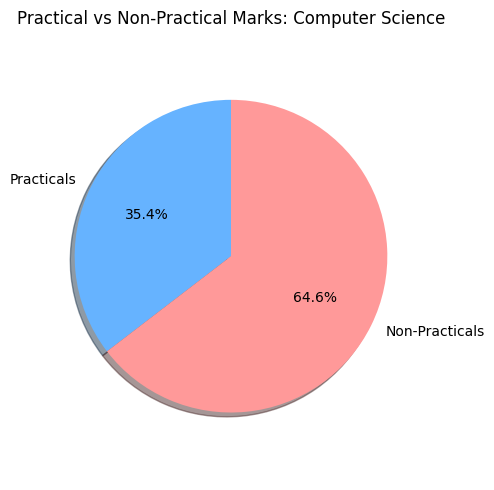

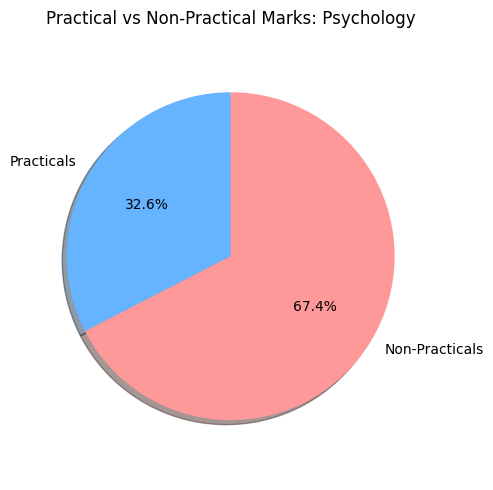

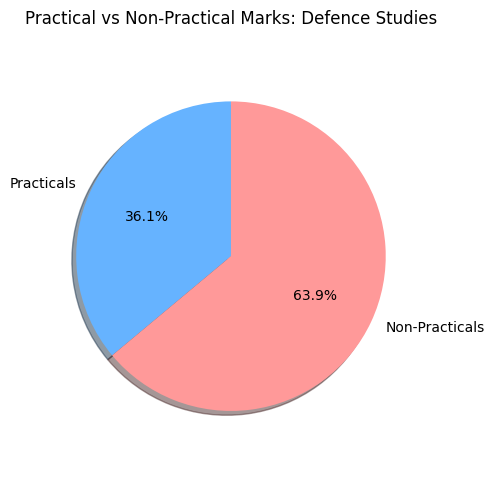

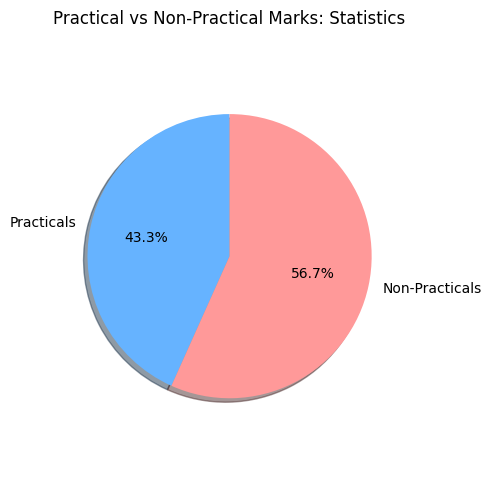

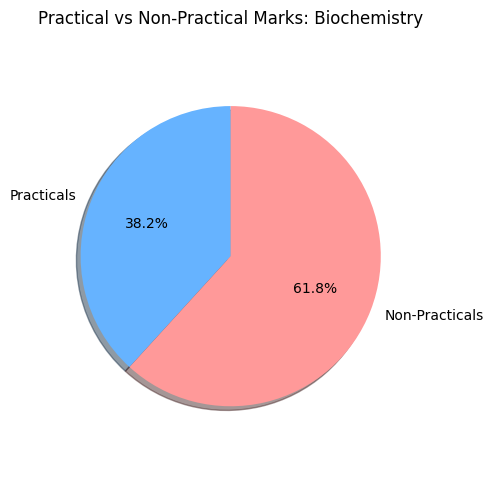

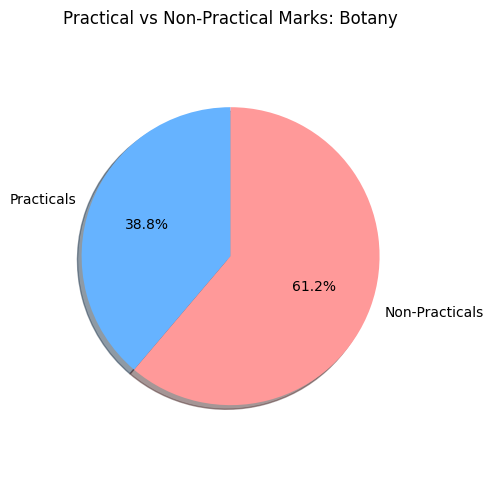

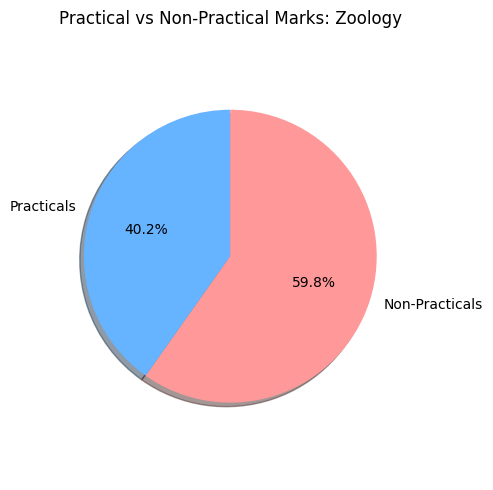

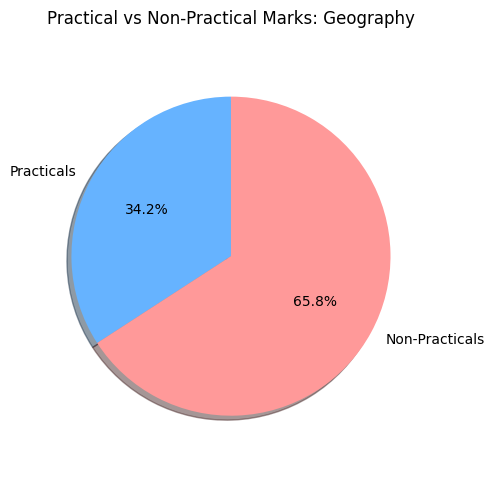

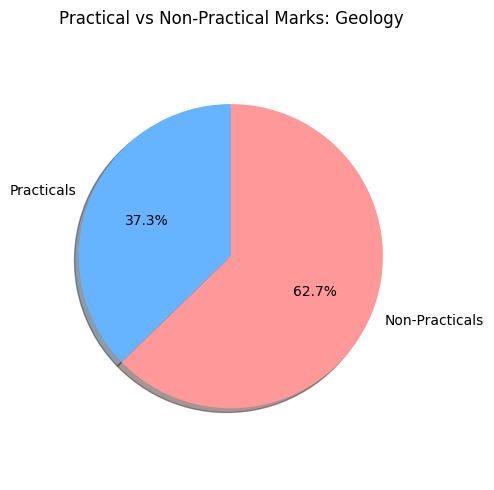

In [96]:
import matplotlib.pyplot as plt

for subject in practicals_sum:
    practical = practicals_sum[subject]
    non_practical = non_practicals_sum.get(subject, 0)
    
    labels = ['Practicals', 'Non-Practicals']
    sizes = [practical, non_practical]
    colors = ['#66b3ff', '#ff9999']

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
            startangle=90, shadow=True)
    plt.title(f'Practical vs Non-Practical Marks: {subject}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

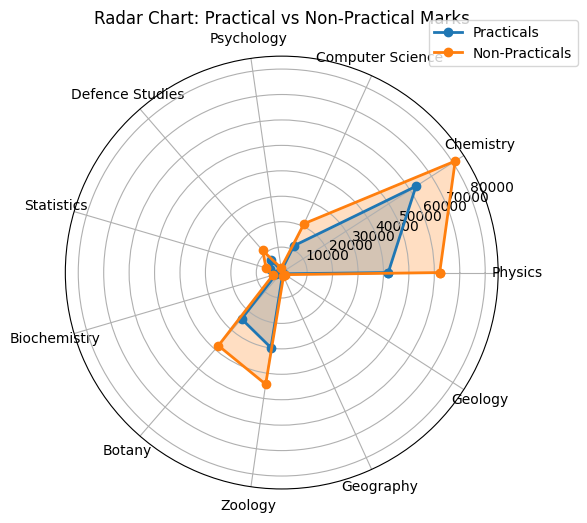

In [98]:
import matplotlib.pyplot as plt
import numpy as np

labels = np.array(subjects)
practical = np.array(practical_marks)
non_practical = np.array(non_practical_marks)

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

practical = np.concatenate((practical, [practical[0]]))
non_practical = np.concatenate((non_practical, [non_practical[0]]))

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, practical, 'o-', linewidth=2, label='Practicals')
ax.fill(angles, practical, alpha=0.25)

ax.plot(angles, non_practical, 'o-', linewidth=2, label='Non-Practicals')
ax.fill(angles, non_practical, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title('Radar Chart: Practical vs Non-Practical Marks')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

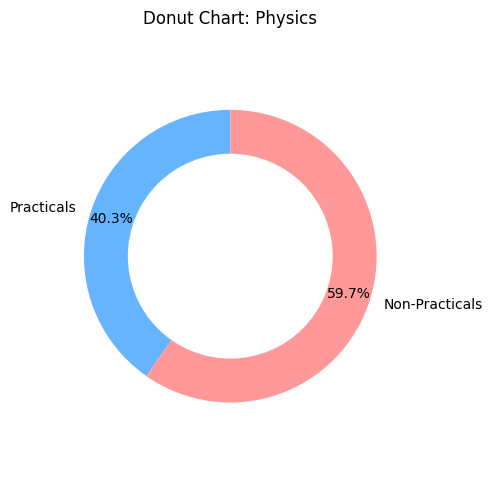

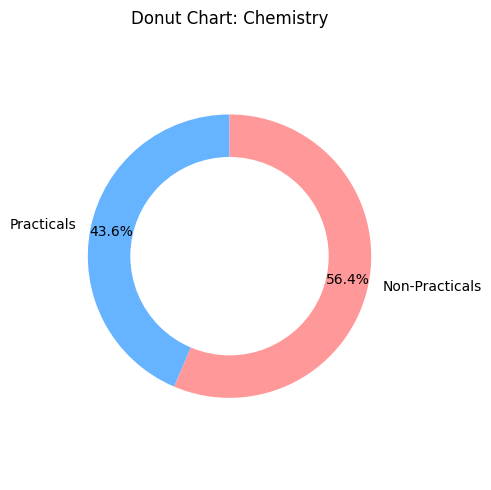

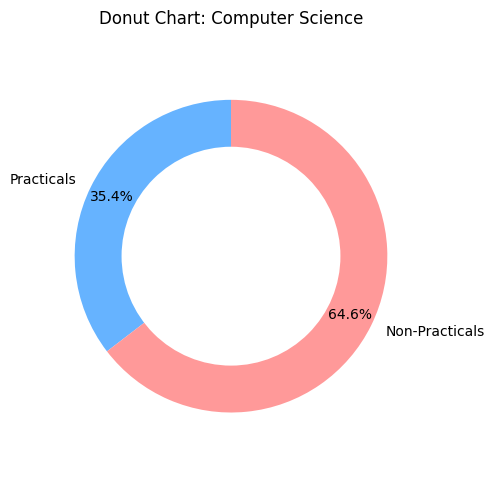

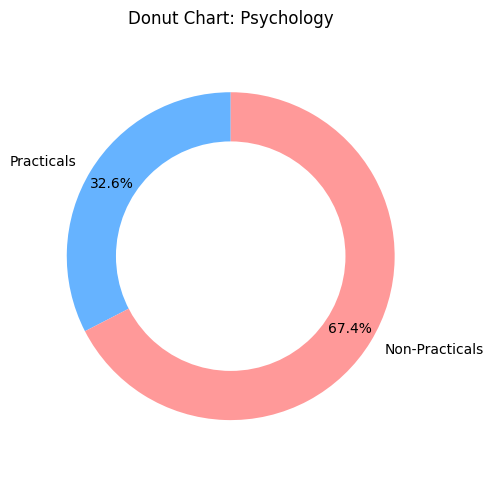

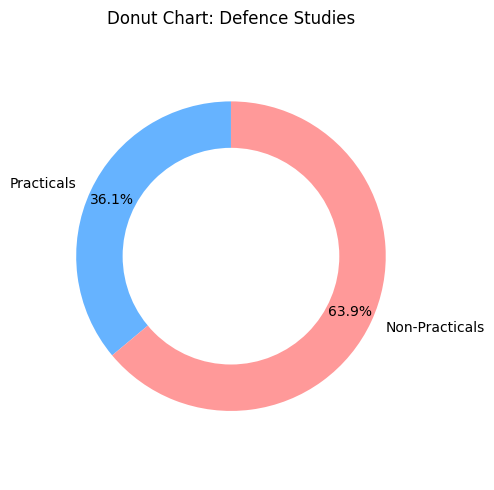

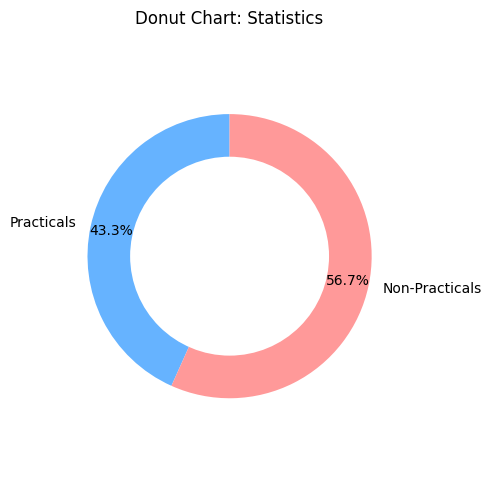

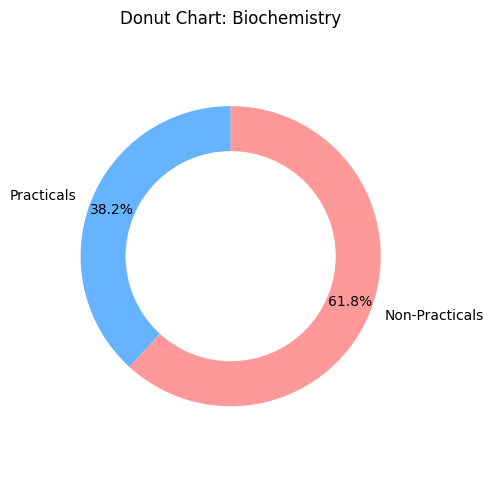

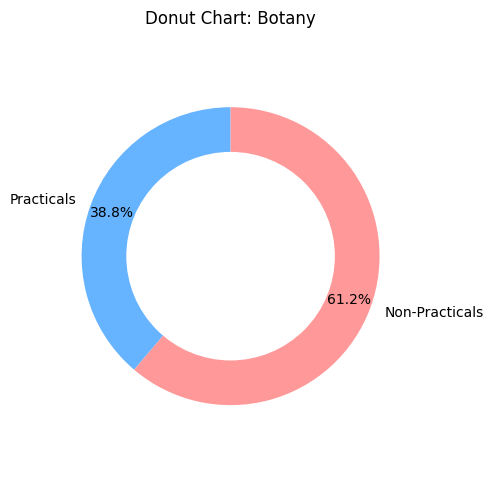

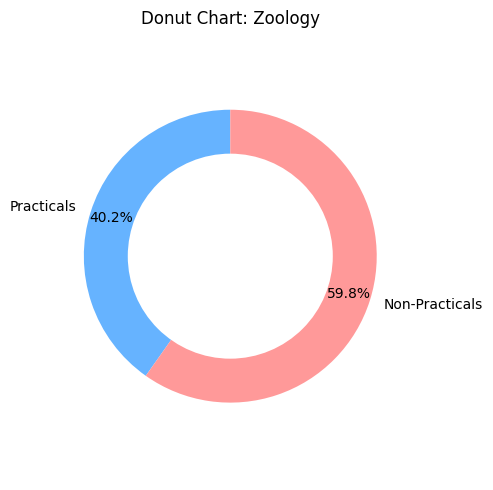

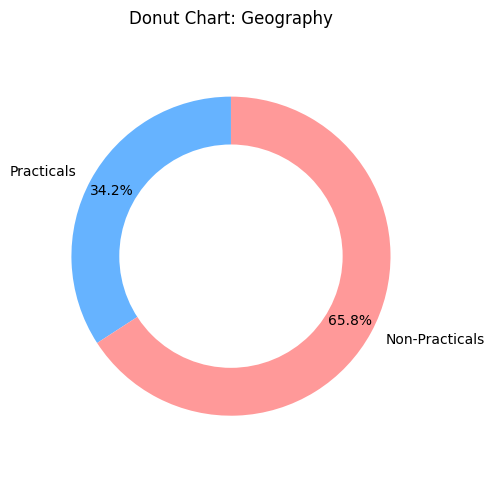

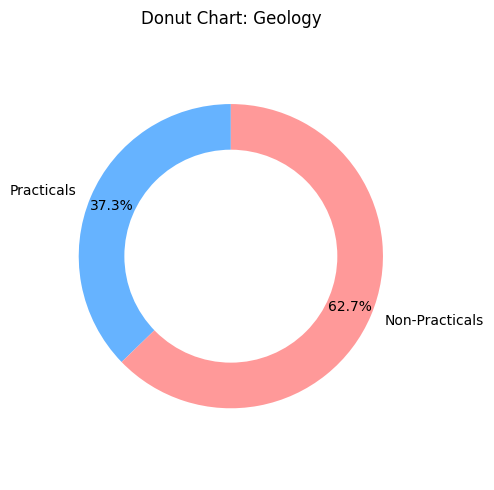

In [99]:
import matplotlib.pyplot as plt

for subject in practicals_sum:
    practical = practicals_sum[subject]
    non_practical = non_practicals_sum.get(subject, 0)

    # Data and labels
    labels = ['Practicals', 'Non-Practicals']
    sizes = [practical, non_practical]
    colors = ['#66b3ff', '#ff9999']

    # Create Pie chart with a hole (donut chart)
    plt.figure(figsize=(5, 5))
    wedges, texts, autotexts = plt.pie(
        sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85
    )

    # Draw a white circle at the center to make it look like a donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Title and aesthetics
    plt.title(f'Donut Chart: {subject}')
    plt.axis('equal')  # Equal aspect ratio to ensure circular shape
    plt.tight_layout()
    plt.show()